In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, os
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [3]:
df = pd.read_csv('Effectifs_pooled.csv')
df.head()

,datetime,Réel,Prévision,joursem,isoweek
0,2011-01-03,11127.0,11905.0,0,1
1,2011-01-04,11800.0,12172.0,1,1
2,2011-01-06,11723.0,12363.0,3,1
3,2011-01-07,12320.0,12423.0,4,1
4,2011-01-10,11281.0,11932.0,0,2


In [4]:
df['datetime']=pd.to_datetime(df['datetime'])
df.info()

In [6]:
df['Mois']= df['datetime'].apply( lambda dt1 : dt1.month)
df['An']= df['datetime'].apply( lambda dt1 : dt1.year)
df.head()

,datetime,Réel,Prévision,joursem,isoweek,Mois,An
0,2011-01-03,11127.0,11905.0,0,1,1,2011
1,2011-01-04,11800.0,12172.0,1,1,1,2011
2,2011-01-06,11723.0,12363.0,3,1,1,2011
3,2011-01-07,12320.0,12423.0,4,1,1,2011
4,2011-01-10,11281.0,11932.0,0,2,1,2011


In [7]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['An','Mois','joursem']])
enc.categories_

[array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
        2022], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12], dtype=int64),
 array([0, 1, 2, 3, 4], dtype=int64)]

In [8]:
X = enc.transform(df[['An','Mois','joursem']]).toarray()
y = df['Réel']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model_fit = model.fit(X_train, y_train)

In [11]:
model_fit.coef_

array([-2.48697017e+15, -2.48697017e+15, -2.48697017e+15, -2.48697017e+15,
       -2.48697017e+15, -2.48697017e+15, -2.48697017e+15, -2.48697017e+15,
       -2.48697017e+15, -2.48697017e+15, -2.48697017e+15, -2.48697017e+15,
        2.71115942e+15,  2.71115942e+15,  2.71115942e+15,  2.71115942e+15,
        2.71115942e+15,  2.71115942e+15,  2.71115942e+15,  2.71115942e+15,
        2.71115942e+15,  2.71115942e+15,  2.71115942e+15,  1.43367134e+16,
        1.43367134e+16,  1.43367134e+16,  1.43367134e+16,  1.43367134e+16])

In [12]:
model_fit.intercept_

-1.4560902653827422e+16

In [13]:
y_train_pred = model_fit.predict(X_train)
y_test_pred = model_fit.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
df_metric = pd.DataFrame( {'MSE': [mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)],
                           'r2': [r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)]}, index=['Train','Test'] )

df_metric.head()

,MSE,r2
Train,820011.23951,0.660895
Test,970242.56446,0.613708


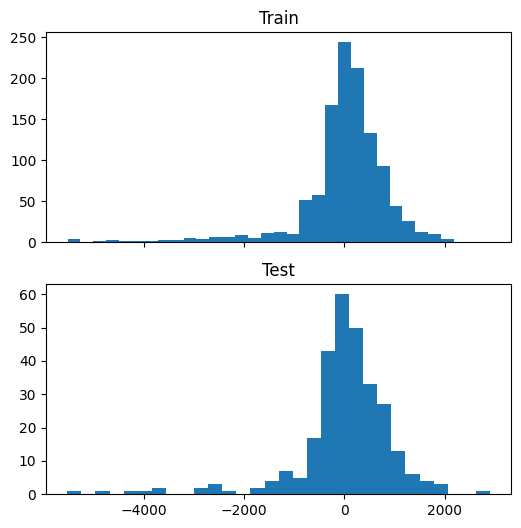

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6), sharex=True)
ax1.set_title('Train')
ax1.hist(y_train-y_train_pred, bins = 30)
ax2.set_title('Test')
ax2.hist(y_test-y_test_pred, bins = 30)
plt.show()

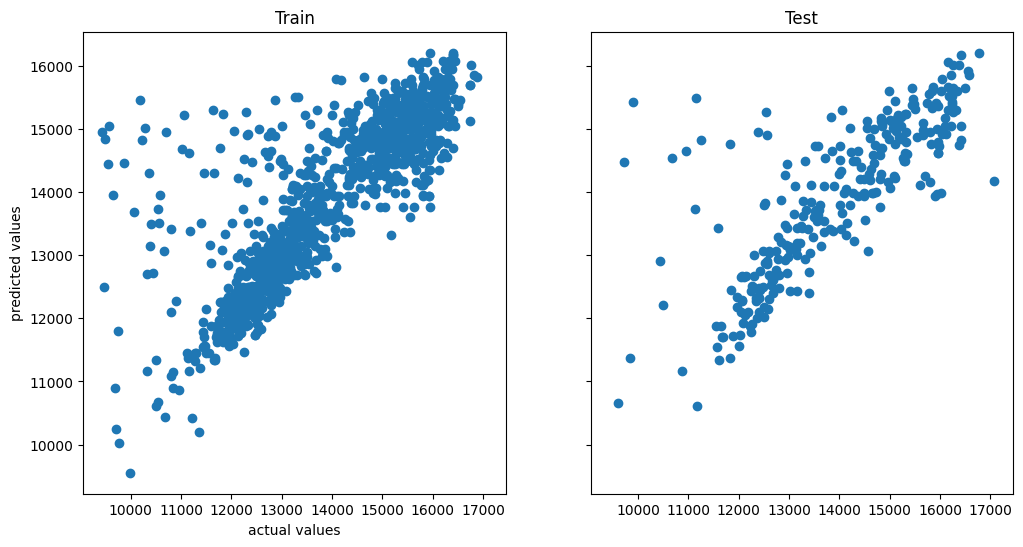

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
ax1.set_title('Train')
ax1.set_xlabel('actual values')
ax1.set_ylabel('predicted values')
ax1.scatter(x=y_train, y=y_train_pred)
ax2.set_title('Test')
ax2.scatter(x=y_test, y=y_test_pred)
plt.show()